In [1]:
#Import Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
from scipy.stats import linregress
from census import Census
from config import census_key


In [2]:
# Store filepaths into variables
total_asset_loan_value_csv = Path("Resources/Total Loan Assets.csv")
average_rate_of_financed_loan_csv = Path("Resources/Average Loan Finance.csv")
average_amount_financed_csv= Path("Resources/Average Amount Financed.csv")
total_vehicle_sales_csv = Path("Resources/Total Vehicle Sales.csv")
total_population_csv = Path("Resources/Total Population USA.csv")


In [3]:
# Read the CSV files
total_asset_loan_value_df = pd.read_csv(total_asset_loan_value_csv)
average_rate_of_financed_loan_df = pd.read_csv(average_rate_of_financed_loan_csv)
average_amount_financed_df = pd.read_csv(average_amount_financed_csv)
total_vehicle_sales_df = pd.read_csv(total_vehicle_sales_csv)
total_population_df = pd.read_csv(total_population_csv)

In [4]:
#Dispay the data
total_asset_loan_value_df.head()

,DATE,QBPBSTASLNINDVOLNINDCARLN
0,2014-07-01,379531.304
1,2014-10-01,385156.262
2,2015-01-01,389633.848
3,2015-04-01,397633.220
4,2015-07-01,407873.676


In [5]:
#Rename Columns & Change to Float
total_asset_loan_value_df = total_asset_loan_value_df.rename(columns={"QBPBSTASLNINDVOLNINDCARLN": "Total Loan Amount"})
total_asset_loan_value_df.head()

,DATE,Total Loan Amount
0,2014-07-01,379531.304
1,2014-10-01,385156.262
2,2015-01-01,389633.848
3,2015-04-01,397633.220
4,2015-07-01,407873.676


In [6]:
total_asset_loan_value_df = pd.DataFrame(total_asset_loan_value_df)
total_asset_loan_value_df["Total Loan Amount Millions"] = total_asset_loan_value_df["Total Loan Amount"] * 1000000
total_asset_loan_value_df = total_asset_loan_value_df.dropna()
total_asset_loan_value_df["Total Loan Amount Millions"] = total_asset_loan_value_df["Total Loan Amount Millions"].astype('int64')
total_asset_loan_value_df.head()

,DATE,Total Loan Amount,Total Loan Amount Millions
0,2014-07-01,379531.304,379531304000
1,2014-10-01,385156.262,385156262000
2,2015-01-01,389633.848,389633848000
3,2015-04-01,397633.220,397633220000
4,2015-07-01,407873.676,407873676000


In [7]:
average_rate_of_financed_loan_df.head()

,DATE,RIELPCFANNM
0,2014-07-01,4.68
1,2014-10-01,4.82
2,2015-01-01,5.19
3,2015-04-01,5.38
4,2015-07-01,4.92


In [8]:
#Rename Columns
average_rate_of_financed_loan_df = average_rate_of_financed_loan_df.rename(columns={"RIELPCFANNM": "Average Loan Rate"})
average_rate_of_financed_loan_df['Average Loan Rate'] = pd.to_numeric(average_rate_of_financed_loan_df['Average Loan Rate'], errors='coerce').fillna(0.0)
average_rate_of_financed_loan_df.head()

,DATE,Average Loan Rate
0,2014-07-01,4.68
1,2014-10-01,4.82
2,2015-01-01,5.19
3,2015-04-01,5.38
4,2015-07-01,4.92


In [9]:
average_rate_of_financed_loan_df["Average Loan Rate % by Quatre"] = average_rate_of_financed_loan_df["Average Loan Rate"] / 100 * 4
average_rate_of_financed_loan_df.head()

,DATE,Average Loan Rate,Average Loan Rate % by Quatre
0,2014-07-01,4.68,0.1872
1,2014-10-01,4.82,0.1928
2,2015-01-01,5.19,0.2076
3,2015-04-01,5.38,0.2152
4,2015-07-01,4.92,0.1968


In [10]:
average_amount_financed_df.head()

,DATE,DTCTLVENANM
0,2014-07-01,26370.63
1,2014-10-01,26755.30
2,2015-01-01,27272.36
3,2015-04-01,26932.27
4,2015-07-01,27697.60


In [11]:
average_amount_financed_df=average_amount_financed_df.rename(columns={"DTCTLVENANM": "Average Financed Amount"})
average_amount_financed_df['Average Financed Amount'] = pd.to_numeric(average_amount_financed_df['Average Financed Amount'], errors='coerce').fillna(0.0)
average_amount_financed_df.dtypes

DATE                        object
Average Financed Amount    float64
dtype: object

In [12]:
#Merge the dataframes
revenue_rate_df = pd.merge(total_asset_loan_value_df, average_rate_of_financed_loan_df, on="DATE")
revenue_rate_df.dtypes

DATE                              object
Total Loan Amount                float64
Total Loan Amount Millions         int64
Average Loan Rate                float64
Average Loan Rate % by Quatre    float64
dtype: object

In [13]:
#Merge the dataframes
clean_df = pd.merge(revenue_rate_df, average_amount_financed_df, on="DATE")
clean_df.head()

,DATE,Total Loan Amount,Total Loan Amount Millions,Average Loan Rate,Average Loan Rate % by Quatre,Average Financed Amount
0,2014-07-01,379531.304,379531304000,4.68,0.1872,26370.63
1,2014-10-01,385156.262,385156262000,4.82,0.1928,26755.30
2,2015-01-01,389633.848,389633848000,5.19,0.2076,27272.36
3,2015-04-01,397633.220,397633220000,5.38,0.2152,26932.27
4,2015-07-01,407873.676,407873676000,4.92,0.1968,27697.60


In [14]:
#Calculate average amount financed by and multiply by the average rate of that period = give us new total of revenue generated during that month
clean_df.dtypes

DATE                              object
Total Loan Amount                float64
Total Loan Amount Millions         int64
Average Loan Rate                float64
Average Loan Rate % by Quatre    float64
Average Financed Amount          float64
dtype: object

In [15]:
clean_df["Revenue Generated"] = clean_df["Average Financed Amount"] * clean_df["Average Loan Rate % by Quatre"] + clean_df["Average Financed Amount"]
clean_df.head()

,DATE,Total Loan Amount,Total Loan Amount Millions,Average Loan Rate,Average Loan Rate % by Quatre,Average Financed Amount,Revenue Generated
0,2014-07-01,379531.304,379531304000,4.68,0.1872,26370.63,31307.211936
1,2014-10-01,385156.262,385156262000,4.82,0.1928,26755.30,31913.721840
2,2015-01-01,389633.848,389633848000,5.19,0.2076,27272.36,32934.101936
3,2015-04-01,397633.220,397633220000,5.38,0.2152,26932.27,32728.094504
4,2015-07-01,407873.676,407873676000,4.92,0.1968,27697.60,33148.487680


In [16]:
clean_df.dtypes

DATE                              object
Total Loan Amount                float64
Total Loan Amount Millions         int64
Average Loan Rate                float64
Average Loan Rate % by Quatre    float64
Average Financed Amount          float64
Revenue Generated                float64
dtype: object

In [17]:
clean_df["Total People"] = clean_df["Total Loan Amount Millions"] / clean_df["Revenue Generated"]
clean_df["Total People"] = clean_df["Total People"].astype(int)
clean_df.head()

,DATE,Total Loan Amount,Total Loan Amount Millions,Average Loan Rate,Average Loan Rate % by Quatre,Average Financed Amount,Revenue Generated,Total People
0,2014-07-01,379531.304,379531304000,4.68,0.1872,26370.63,31307.211936,12122807
1,2014-10-01,385156.262,385156262000,4.82,0.1928,26755.30,31913.721840,12068672
2,2015-01-01,389633.848,389633848000,5.19,0.2076,27272.36,32934.101936,11830711
3,2015-04-01,397633.220,397633220000,5.38,0.2152,26932.27,32728.094504,12149598
4,2015-07-01,407873.676,407873676000,4.92,0.1968,27697.60,33148.487680,12304442


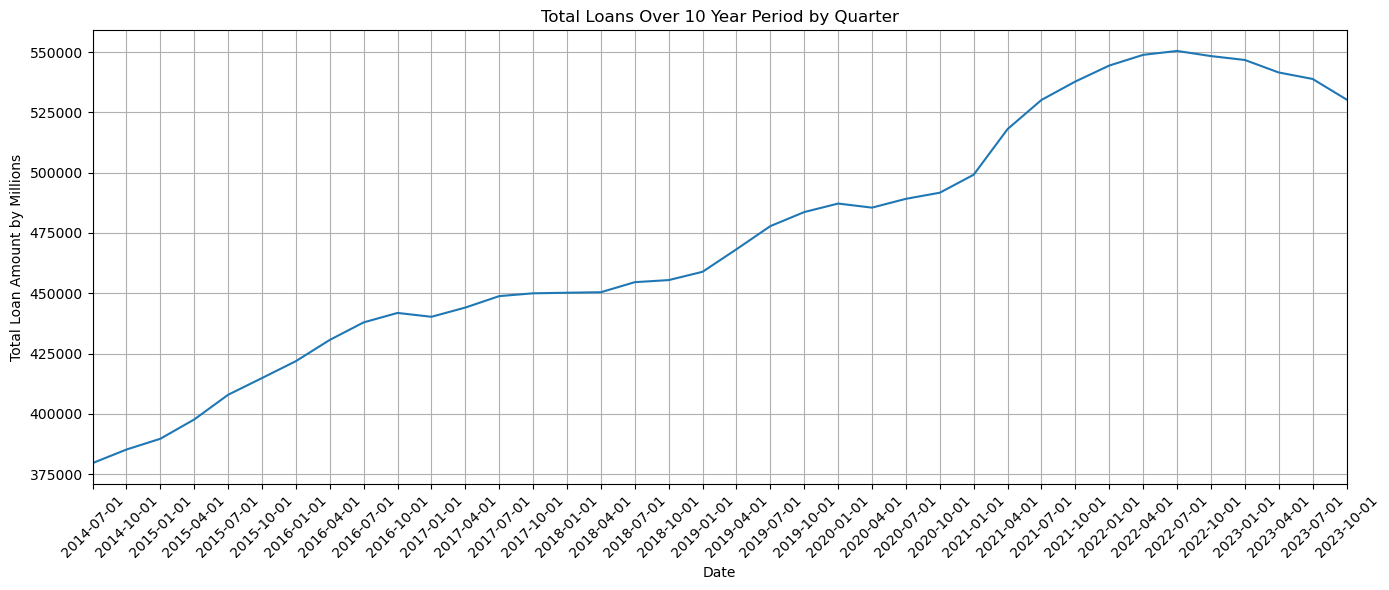

In [18]:
date = clean_df["DATE"]
Total_Loan_Amount = clean_df["Total Loan Amount"]
plt.figure(figsize=(14,6))
plt.plot(date, Total_Loan_Amount)
plt.title("Total Loans Over 10 Year Period by Quarter")
plt.xlabel("Date")
plt.ylabel("Total Loan Amount by Millions")
plt.xlim(clean_df["DATE"].min(),clean_df["DATE"].max())
plt.xticks(rotation=45) 
plt.grid(True)
plt.tight_layout()
plt.show()

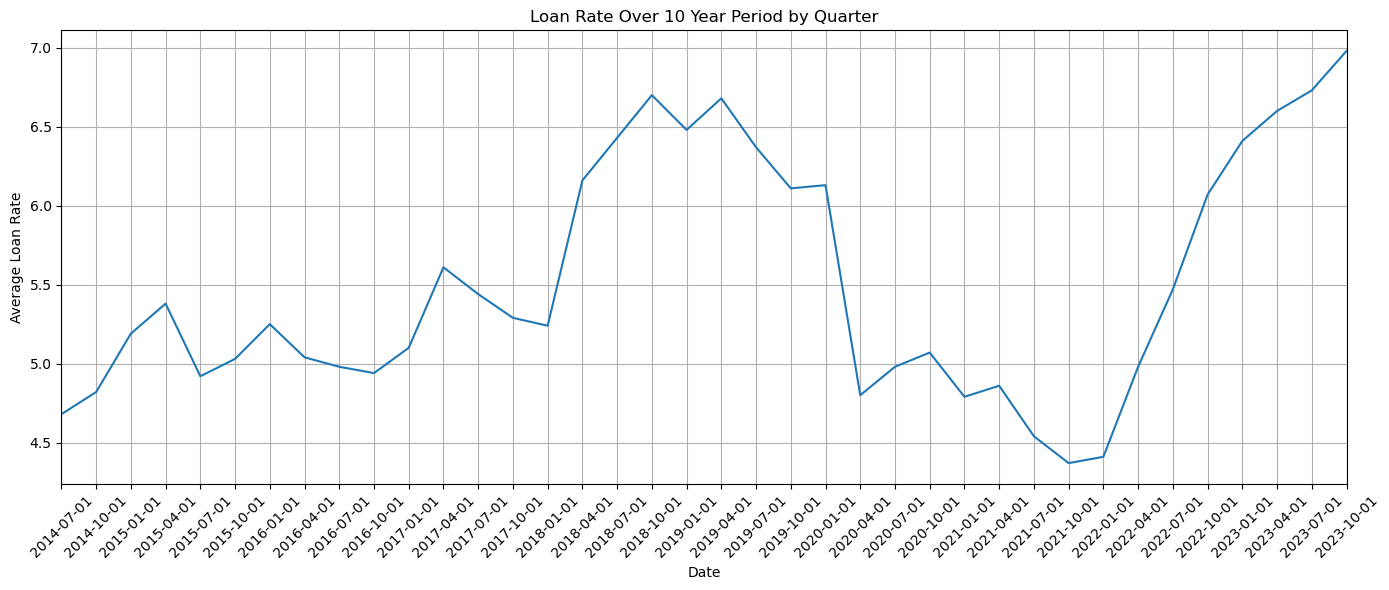

In [19]:
date = clean_df["DATE"]
Average_Loan_Rate = clean_df["Average Loan Rate"]
plt.figure(figsize=(14,6))
plt.plot(date, Average_Loan_Rate)
plt.title("Loan Rate Over 10 Year Period by Quarter")
plt.xlabel("Date")
plt.ylabel("Average Loan Rate")
plt.xlim(clean_df["DATE"].min(),clean_df["DATE"].max())
plt.xticks(rotation=45) 
plt.grid(True)
plt.tight_layout()
plt.show()

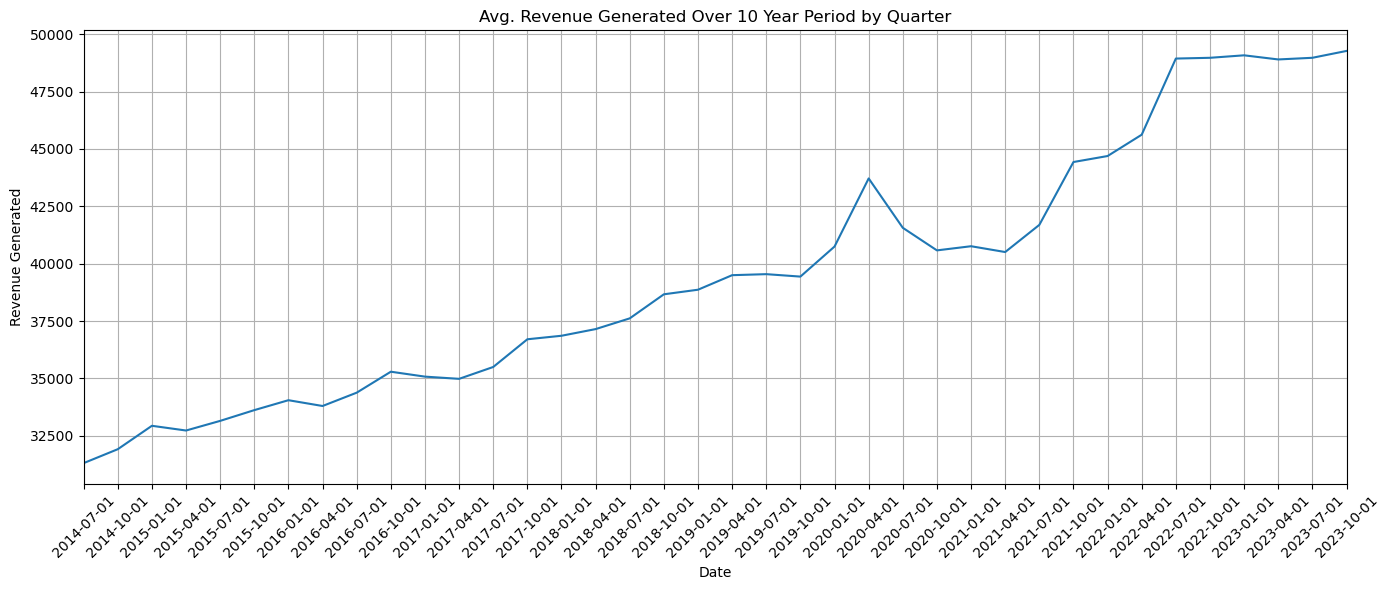

In [20]:
date = clean_df["DATE"]
Revenue_Generated = clean_df["Revenue Generated"]
plt.figure(figsize=(14,6))
plt.plot(date, Revenue_Generated)
plt.title("Avg. Revenue Generated Over 10 Year Period by Quarter")
plt.xlabel("Date")
plt.ylabel("Revenue Generated")
plt.xlim(clean_df["DATE"].min(),clean_df["DATE"].max())
plt.xticks(rotation=45) 
plt.grid(True)
plt.tight_layout()
plt.show()

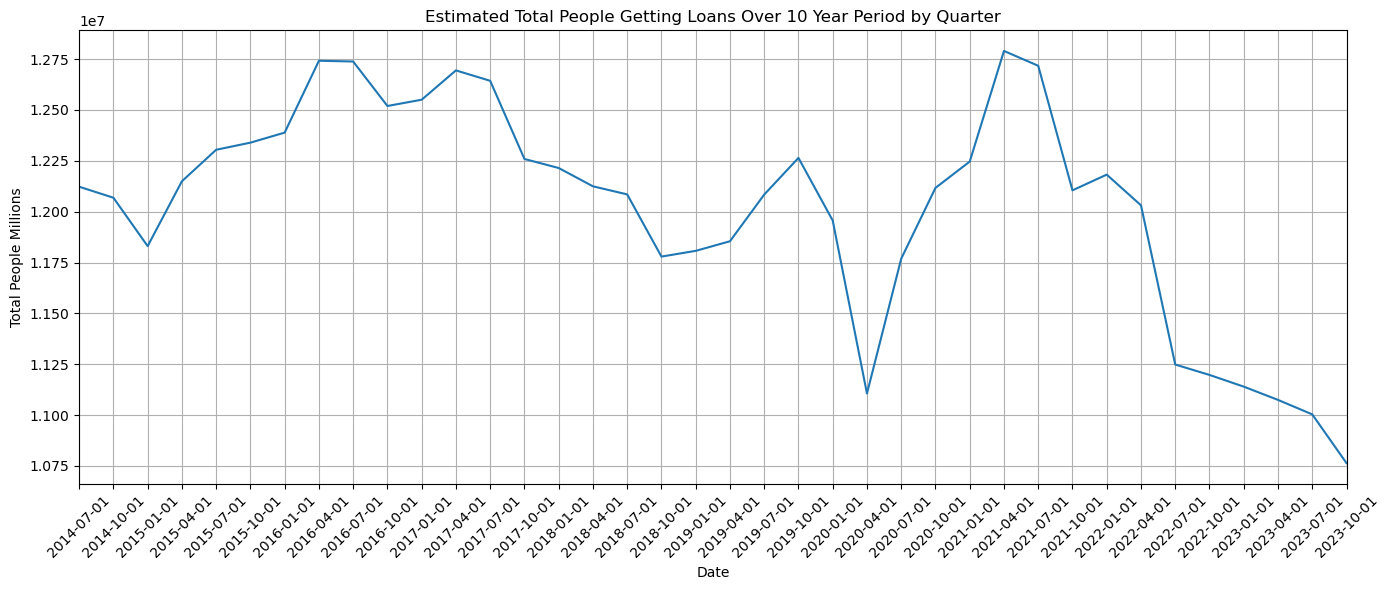

In [21]:
date = clean_df["DATE"]
Total_People = clean_df["Total People"]
plt.figure(figsize=(14,6))
plt.plot(date, Total_People)
plt.title("Estimated Total People Getting Loans Over 10 Year Period by Quarter")
plt.xlabel("Date")
plt.ylabel("Total People Millions")
plt.xlim(clean_df["DATE"].min(),clean_df["DATE"].max())
plt.xticks(rotation=45) 
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
#Display the data
total_vehicle_sales_df.head()

,DATE,TOTALSA
0,2014-07-01,51.475
1,2014-10-01,50.883
2,2015-01-01,51.697
3,2015-04-01,53.511
4,2015-07-01,54.990


In [23]:
#Rename Columns
total_vehicle_sales_df= total_vehicle_sales_df.rename(columns={"TOTALSA": "Total Vehicle Sales"})
total_vehicle_sales_df.head()

,DATE,Total Vehicle Sales
0,2014-07-01,51.475
1,2014-10-01,50.883
2,2015-01-01,51.697
3,2015-04-01,53.511
4,2015-07-01,54.990


In [24]:
#Convert to millions
total_vehicle_sales_df = pd.DataFrame(total_vehicle_sales_df)
total_vehicle_sales_df["Total Vehicle Sales Millions"] = total_vehicle_sales_df["Total Vehicle Sales"] * 1000000
total_vehicle_sales_df = total_vehicle_sales_df.dropna()
total_vehicle_sales_df["Total Vehicle Sales Millions"] = total_vehicle_sales_df["Total Vehicle Sales Millions"].astype(int)
total_vehicle_sales_df.head()

,DATE,Total Vehicle Sales,Total Vehicle Sales Millions
0,2014-07-01,51.475,51475000
1,2014-10-01,50.883,50883000
2,2015-01-01,51.697,51697000
3,2015-04-01,53.511,53511000
4,2015-07-01,54.990,54990000


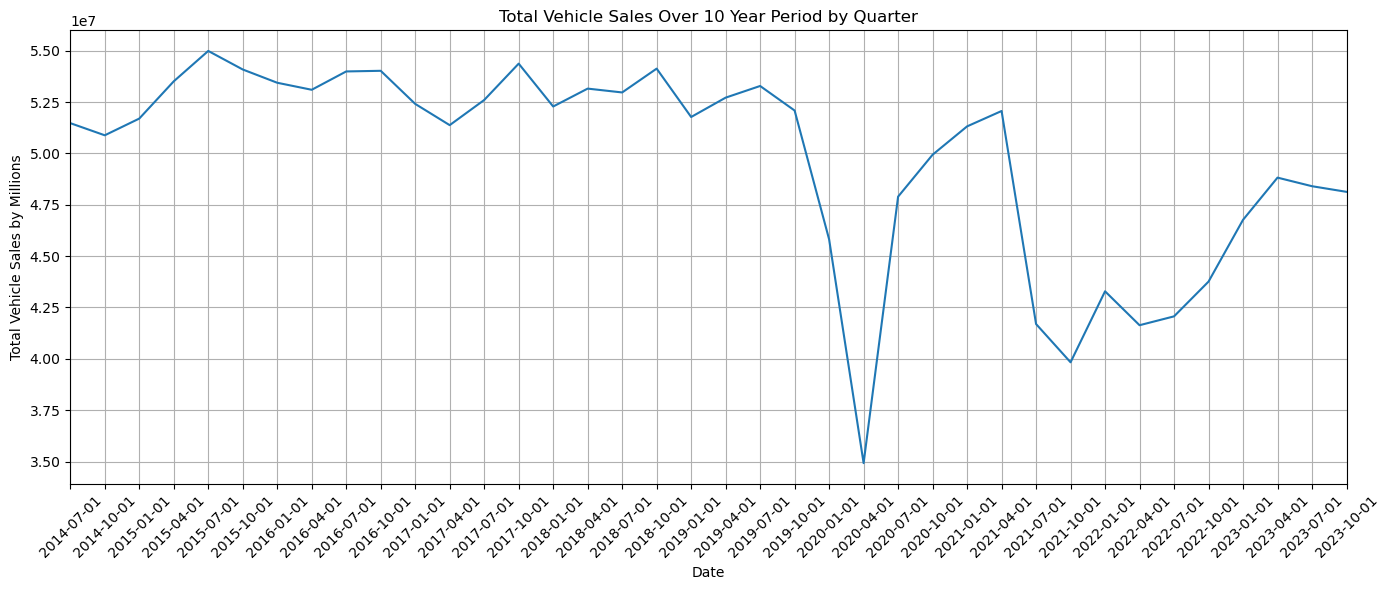

In [25]:
#Plot Total Vehicle Sales Over 10 Year Period by Quatre
date = total_vehicle_sales_df["DATE"]
Total_Vehicle_Sales = total_vehicle_sales_df["Total Vehicle Sales Millions"]
plt.figure(figsize=(14,6))
plt.plot(date, Total_Vehicle_Sales)
plt.title("Total Vehicle Sales Over 10 Year Period by Quarter")
plt.xlabel("Date")
plt.ylabel("Total Vehicle Sales by Millions")
plt.xlim(total_vehicle_sales_df["DATE"].min(),total_vehicle_sales_df["DATE"].max())
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [26]:
total_population_df.head()

,Year,Population
0,2014-07-01,317758058
1,2014-10-01,318386329
2,2015-01-01,318387509
3,2015-04-01,318968455
4,2015-07-01,319549401


In [27]:
total_population_df = total_population_df.rename(columns={"Year": "DATE"})
total_population_df.head()

,DATE,Population
0,2014-07-01,317758058
1,2014-10-01,318386329
2,2015-01-01,318387509
3,2015-04-01,318968455
4,2015-07-01,319549401


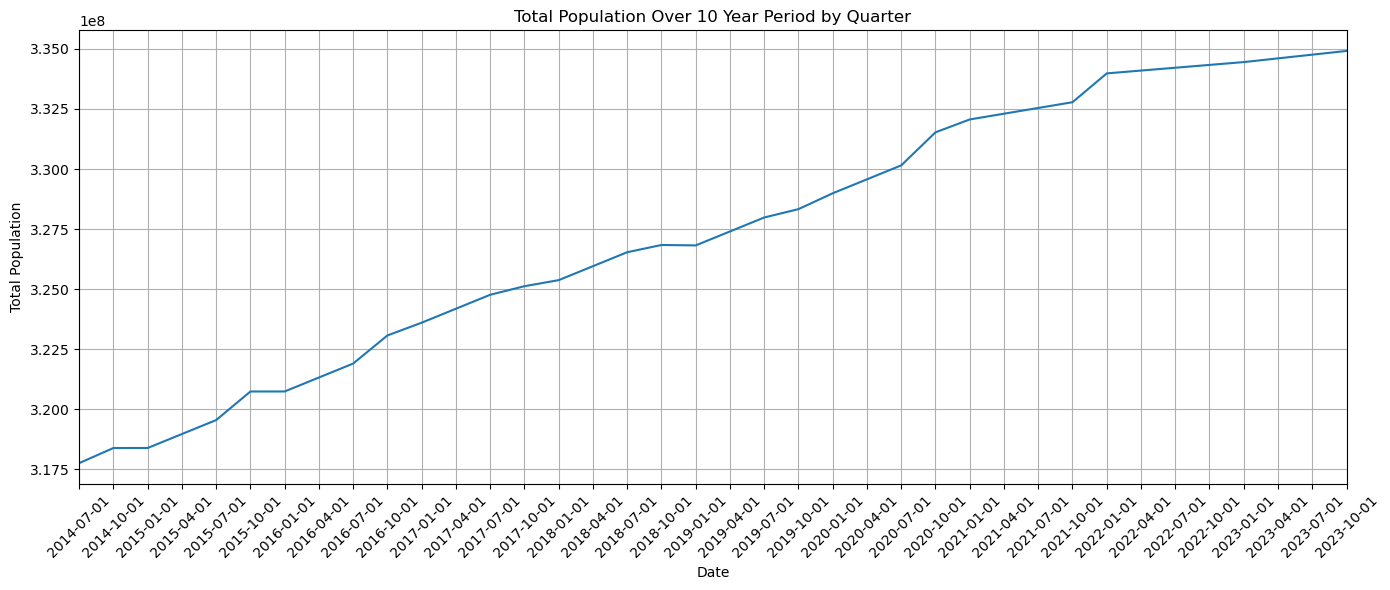

In [28]:
#Plot Total Population Over 10 Year Period by Quarter
date = total_population_df["DATE"]
Total_Population = total_population_df["Population"]
plt.figure(figsize=(14,6))
plt.plot(date, Total_Population)
plt.title("Total Population Over 10 Year Period by Quarter")
plt.xlabel("Date")
plt.ylabel("Total Population")
plt.xlim(total_population_df["DATE"].min(),total_population_df["DATE"].max())
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [31]:
#Merge Total Vehicle Sales and Total Population
vehicle_population_df = pd.merge(total_vehicle_sales_df, total_population_df, on="DATE")
vehicle_population_df.head()

,DATE,Total Vehicle Sales,Total Vehicle Sales Millions,Population
0,2014-07-01,51.475,51475000,317758058
1,2014-10-01,50.883,50883000,318386329
2,2015-01-01,51.697,51697000,318387509
3,2015-04-01,53.511,53511000,318968455
4,2015-07-01,54.990,54990000,319549401


In [29]:
# Initialize the Census object
c = Census(census_key)

# Run the Census Search to retrieve data on the entire country
census_data = c.acs5.get(
    ("B01003_001E",
     ),
     {'for': 'us:*'}
     )

# Convert to DataFrame
census_pd = pd.DataFrame(census_data)

# Column Renaming
census_pd = census_pd.rename(
    columns={"B01003_001E": "Population",
            "us": "Country"
            }
    )

#Assume the population is the same for the entire 10 year period
years = list(range(2014, 2023))
quarters = ["Q1", "Q2", "Q3", "Q4"]

#Create a list of the quarters
quarterly_data = []

#Loop through the years and quarters
for year in years:
    annual_population = census_pd['Population'].iloc[0]
    quarter_population = annual_population / 4
    quarter_population_q1 = quarter_population * 0.99  
    quarter_population_q2 = quarter_population * 1.00  
    quarter_population_q3 = quarter_population * 1.01  
    quarter_population_q4 = quarter_population * 1.02
    
    quarterly_data.append({
        'Year': year,
        'Quarter': "Q1",
        'Population': quarter_population_q1
    })
    quarterly_data.append({
        'Year': year,
        'Quarter': "Q2",
        'Population': quarter_population_q2
    })
    quarterly_data.append({
        'Year': year,
        'Quarter': "Q3",
        'Population': quarter_population_q3
    })
    quarterly_data.append({
        'Year': year,
        'Quarter': "Q4",
        'Population': quarter_population_q4
    })
    
#Convert to DataFrame
quarterly_data_df = pd.DataFrame(quarterly_data)

#Display the data
print(f"Number of rows in the Dataframe: {len(quarterly_data_df)}")
quarterly_data_df.head()

Number of rows in the Dataframe: 36


,Year,Quarter,Population
0,2014,Q1,8.194665e+07
1,2014,Q2,8.277440e+07
2,2014,Q3,8.360214e+07
3,2014,Q4,8.442989e+07
4,2015,Q1,8.194665e+07


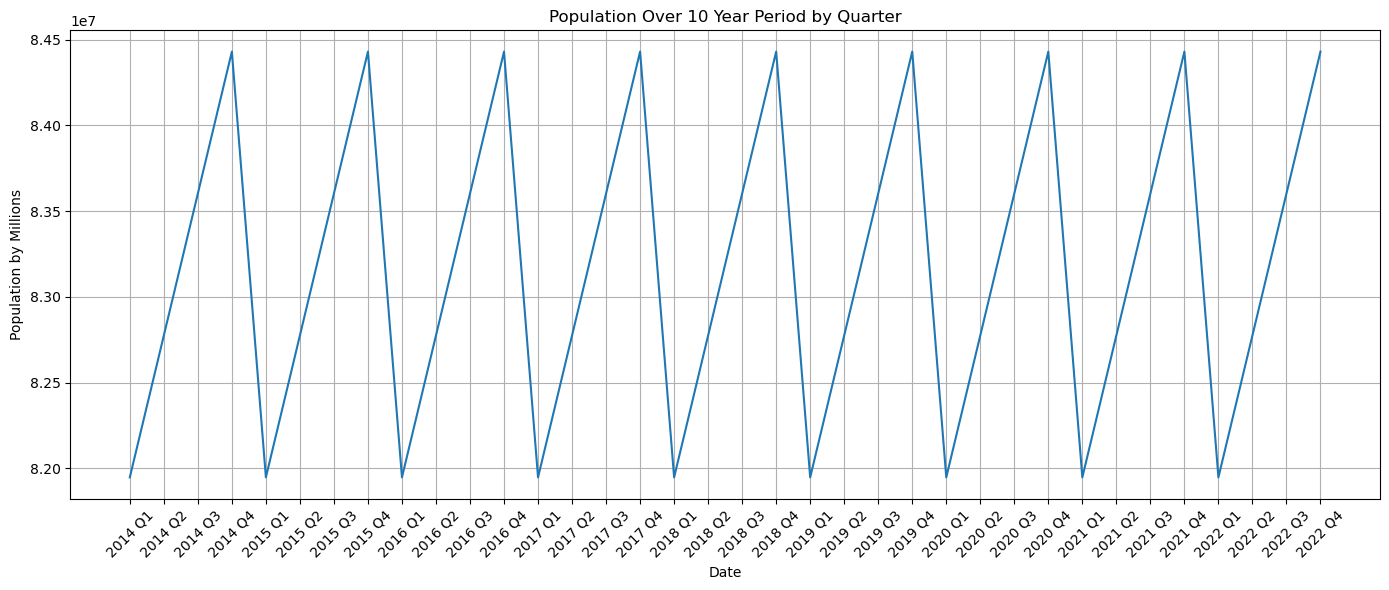

In [30]:
#Plot the Population Over 10 Year Period by Quarter
date = quarterly_data_df["Year"].astype(str) + " " + quarterly_data_df["Quarter"]
Population = quarterly_data_df["Population"]
plt.figure(figsize=(14,6))
plt.plot(date, Population)
plt.title("Population Over 10 Year Period by Quarter")
plt.xlabel("Date")
plt.ylabel("Population by Millions")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()